# Critical lines, Caustics and Light Curves of two point mass lenses system at the same redshift

## The basic ideas to get the:
 - Caustics: by Inverse Ray Shooting
 - Critical lines: by derive the Jacobian Matrix from the lens equation, then compute the magnification using the determine of the Jacobian Matrix
 - Light Curve: Using the result from Invers Ray Shooting

In [30]:
#import related packages and settings
import sys
sys.path.append("../")
from two_pointM_lens_inverse_ray_shoot import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [54]:
# Set mass ratios, positions, angle range, output image size
mass1 = -5e-2
lens1 = Onelens(mass1, (-0.3,0))
lens2 = Onelens(1, (0.3,0))
d1d2 = (0,0)
lens1.dis = d1d2[0]
lens2.dis = d1d2[1]
massratio = lens1.mass/lens2.mass
xlim, ylim = (-2,2), (-2, 2)
ImgSize = (1026,1026) # raw, colume

In [55]:
# generate light rays in the image plane and creat the two lens system and run the inverse ray shooting code
thetax, thetay = genxy(xlim=xlim,ylim=ylim,num=4000)
twolens = Twolenses(lens1, lens2)
twolens.inverse_ray_shooting(thetax, thetay)
twolens.comp_mag_samez(thetax, thetay)

Maximum Magnification:  2883377.2516333675
Minimum Magnification:  1.675251553683001e-13


In [56]:
%%time
# compute the image in source plane and the magnification map in image plane
# srcplaneIMG = twolens.img_mapping(twolens.betax, twolens.betay, xlim, ylim, ImgSize, valarr = np.ones([len(twolens.betax),]))
# imgplaneIMG = twolens.img_mapping(thetax, thetay, xlim, ylim, ImgSize, valarr = twolens.mag)
# imgplaneIMG = np.log10(imgplaneIMG)
srcplaneIMG, imgplaneIMG = twolens.img_mapping_inone(thetax, thetay,twolens.betax, twolens.betay, xlim, ylim, ImgSize,valarr1 = twolens.mag, valarr2 = np.ones([len(thetax),]))
srcplaneIMG += 1

CPU times: user 2.45 s, sys: 4.32 s, total: 6.77 s
Wall time: 26.4 s


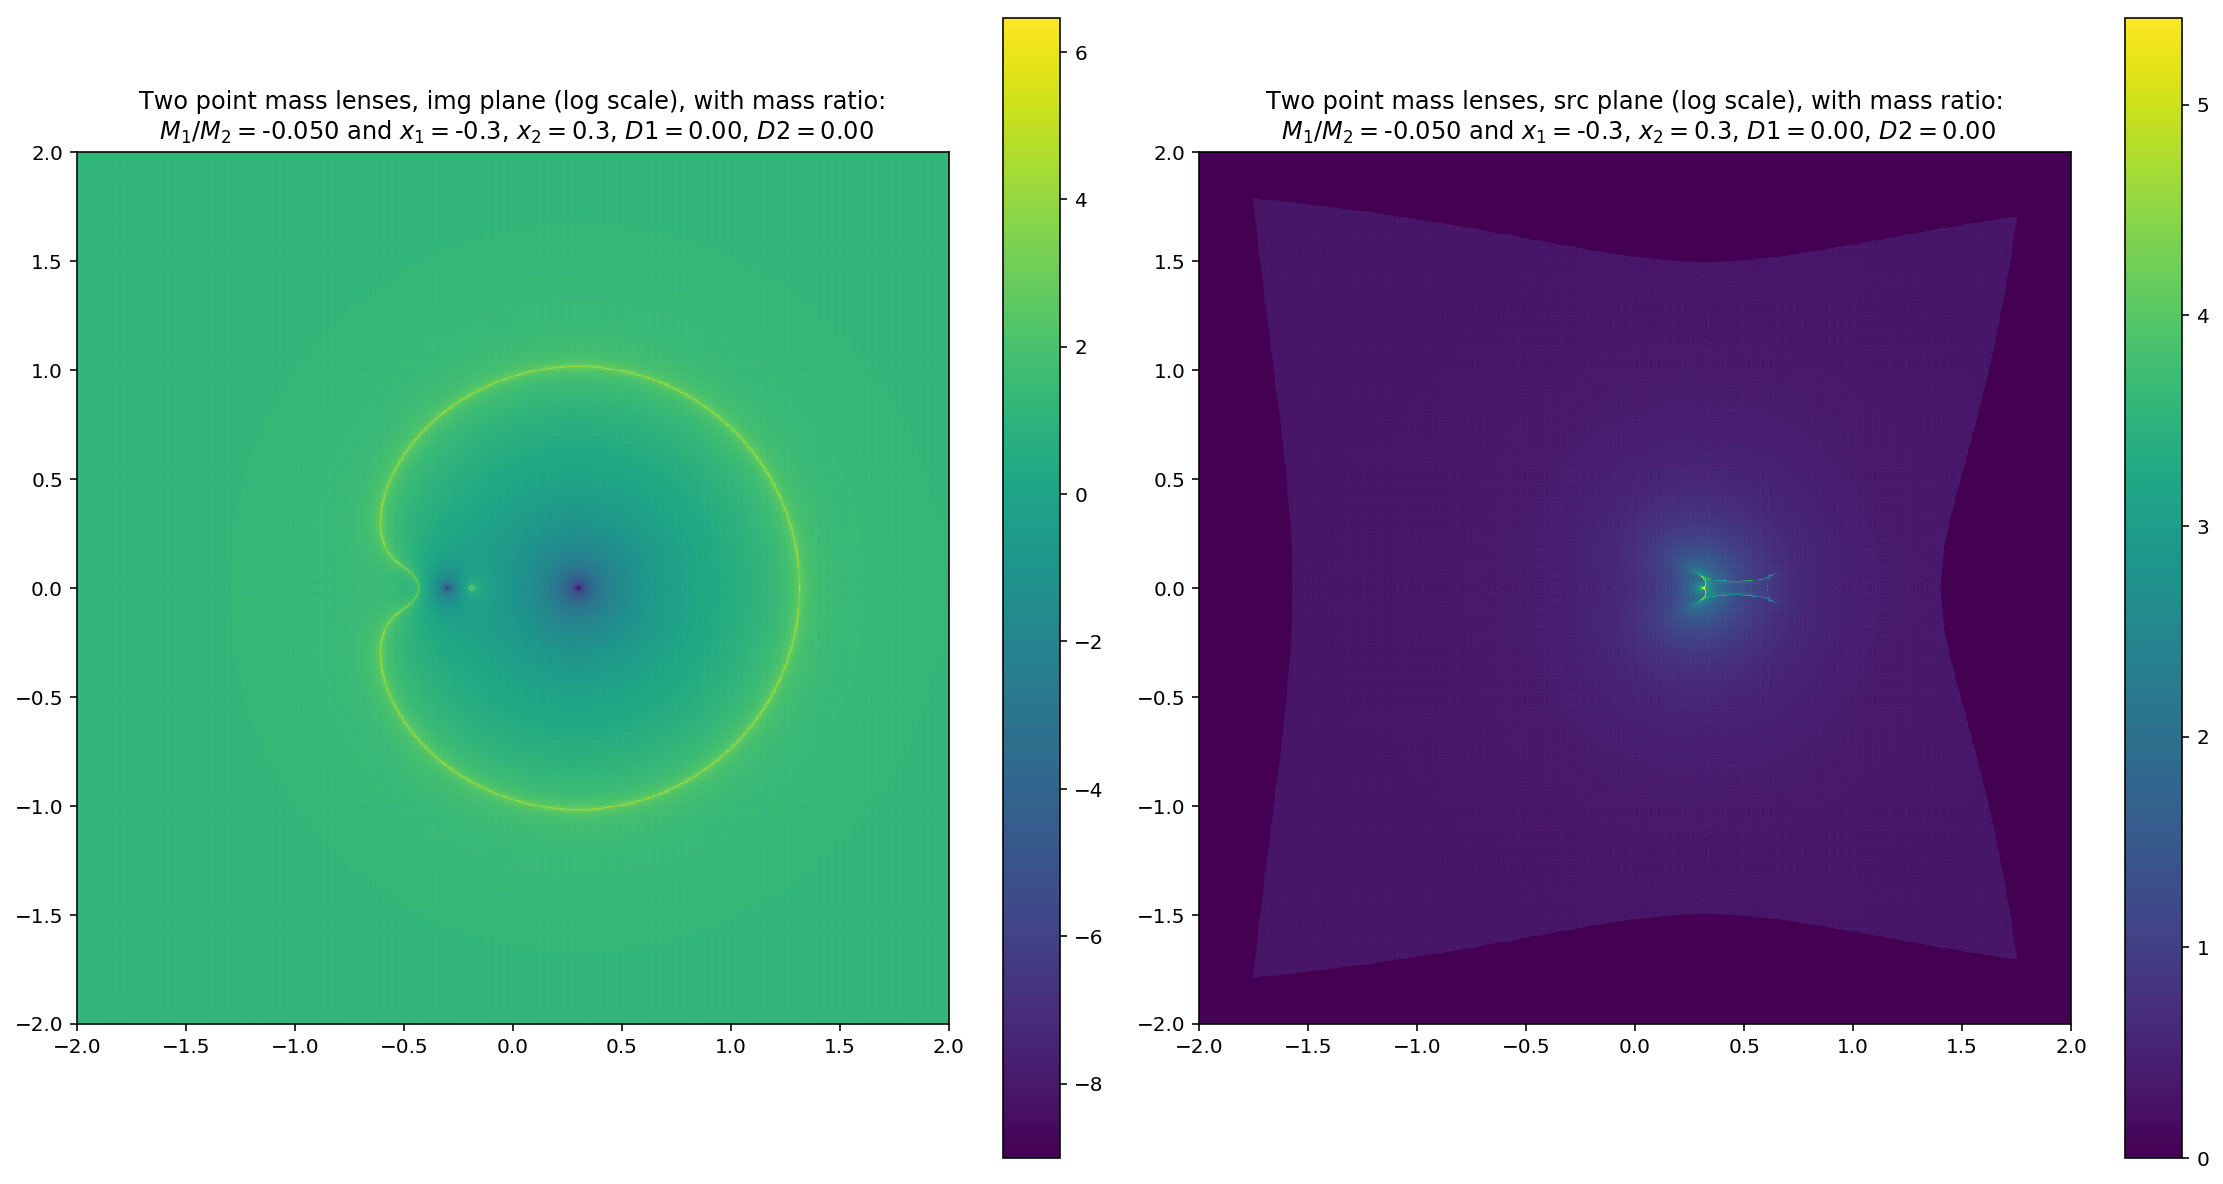

In [57]:
fig = plt.figure()
fig.set_size_inches(16,9)
plt.subplot(122)
cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
plt.imshow(np.log10(srcplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
srctitle = "Two point mass lenses, src plane (log scale), with mass ratio:\n"+r" $M_1/M_2=${:.3f} and $x_1=${:.1f}, $x_2 =${:.1f}, $D1={:.2f}$, $D2={:.2f}$".format(massratio, lens1.pos[0], lens2.pos[0], d1d2[0], d1d2[1])
plt.title(srctitle)
plt.colorbar()
plt.subplot(121)
cmap = plt.cm.get_cmap('viridis')
plt.imshow(np.log10(imgplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
title = "Two point mass lenses, img plane (log scale), with mass ratio:\n"+r" $M_1/M_2=${:.3f} and $x_1=${:.1f}, $x_2 =${:.1f}, $D1={:.2f}$, $D2={:.2f}$".format(massratio, lens1.pos[0], lens2.pos[0], d1d2[0], d1d2[1])
plt.title(title)
plt.colorbar()
plt.subplots_adjust(left=0.04, top = 0.9, bottom = 0.02, right=1, hspace = 0.13, wspace = 0.03)
plt.margins(0,0)
# filename = "./resimgs/neg_mass2point_samez/massratio_{:.3f}X1{:.2f}X2{:.2f}.png".format(massratio,lens1.pos[0],lens2.pos[0])
# fig.savefig(filename, format='png', bbox_inches='tight', dpi=900, pad_inches = 0)#, transparent=True

In [60]:
radius, npoints = 5, 30 # radius in pixel
k = 0.2
B = np.array([0.5,0.4,0.3,0.2,0.1,0.01]) - 0.2
KB = [(k,b) for b in B]
cname = ["r","g","y","k","c","m","w"]
COLLOR = cname[:len(KB)]
Y, LC = {}, {}
scale = 0.9
x = np.linspace(xlim[0]*scale, xlim[1]*scale, int(ImgSize[1]*scale/2))#, endpoint=False
for kb in KB:
    k,b = kb[0], kb[1]
    Y[kb] = k*x + b
    LC[kb] = twolens.com_lightcurve(srcplaneIMG, x, Y[kb], xlim, ylim, radius, npoints)

Generating lightcurve
Generating lightcurve
Generating lightcurve
Generating lightcurve
Generating lightcurve
Generating lightcurve


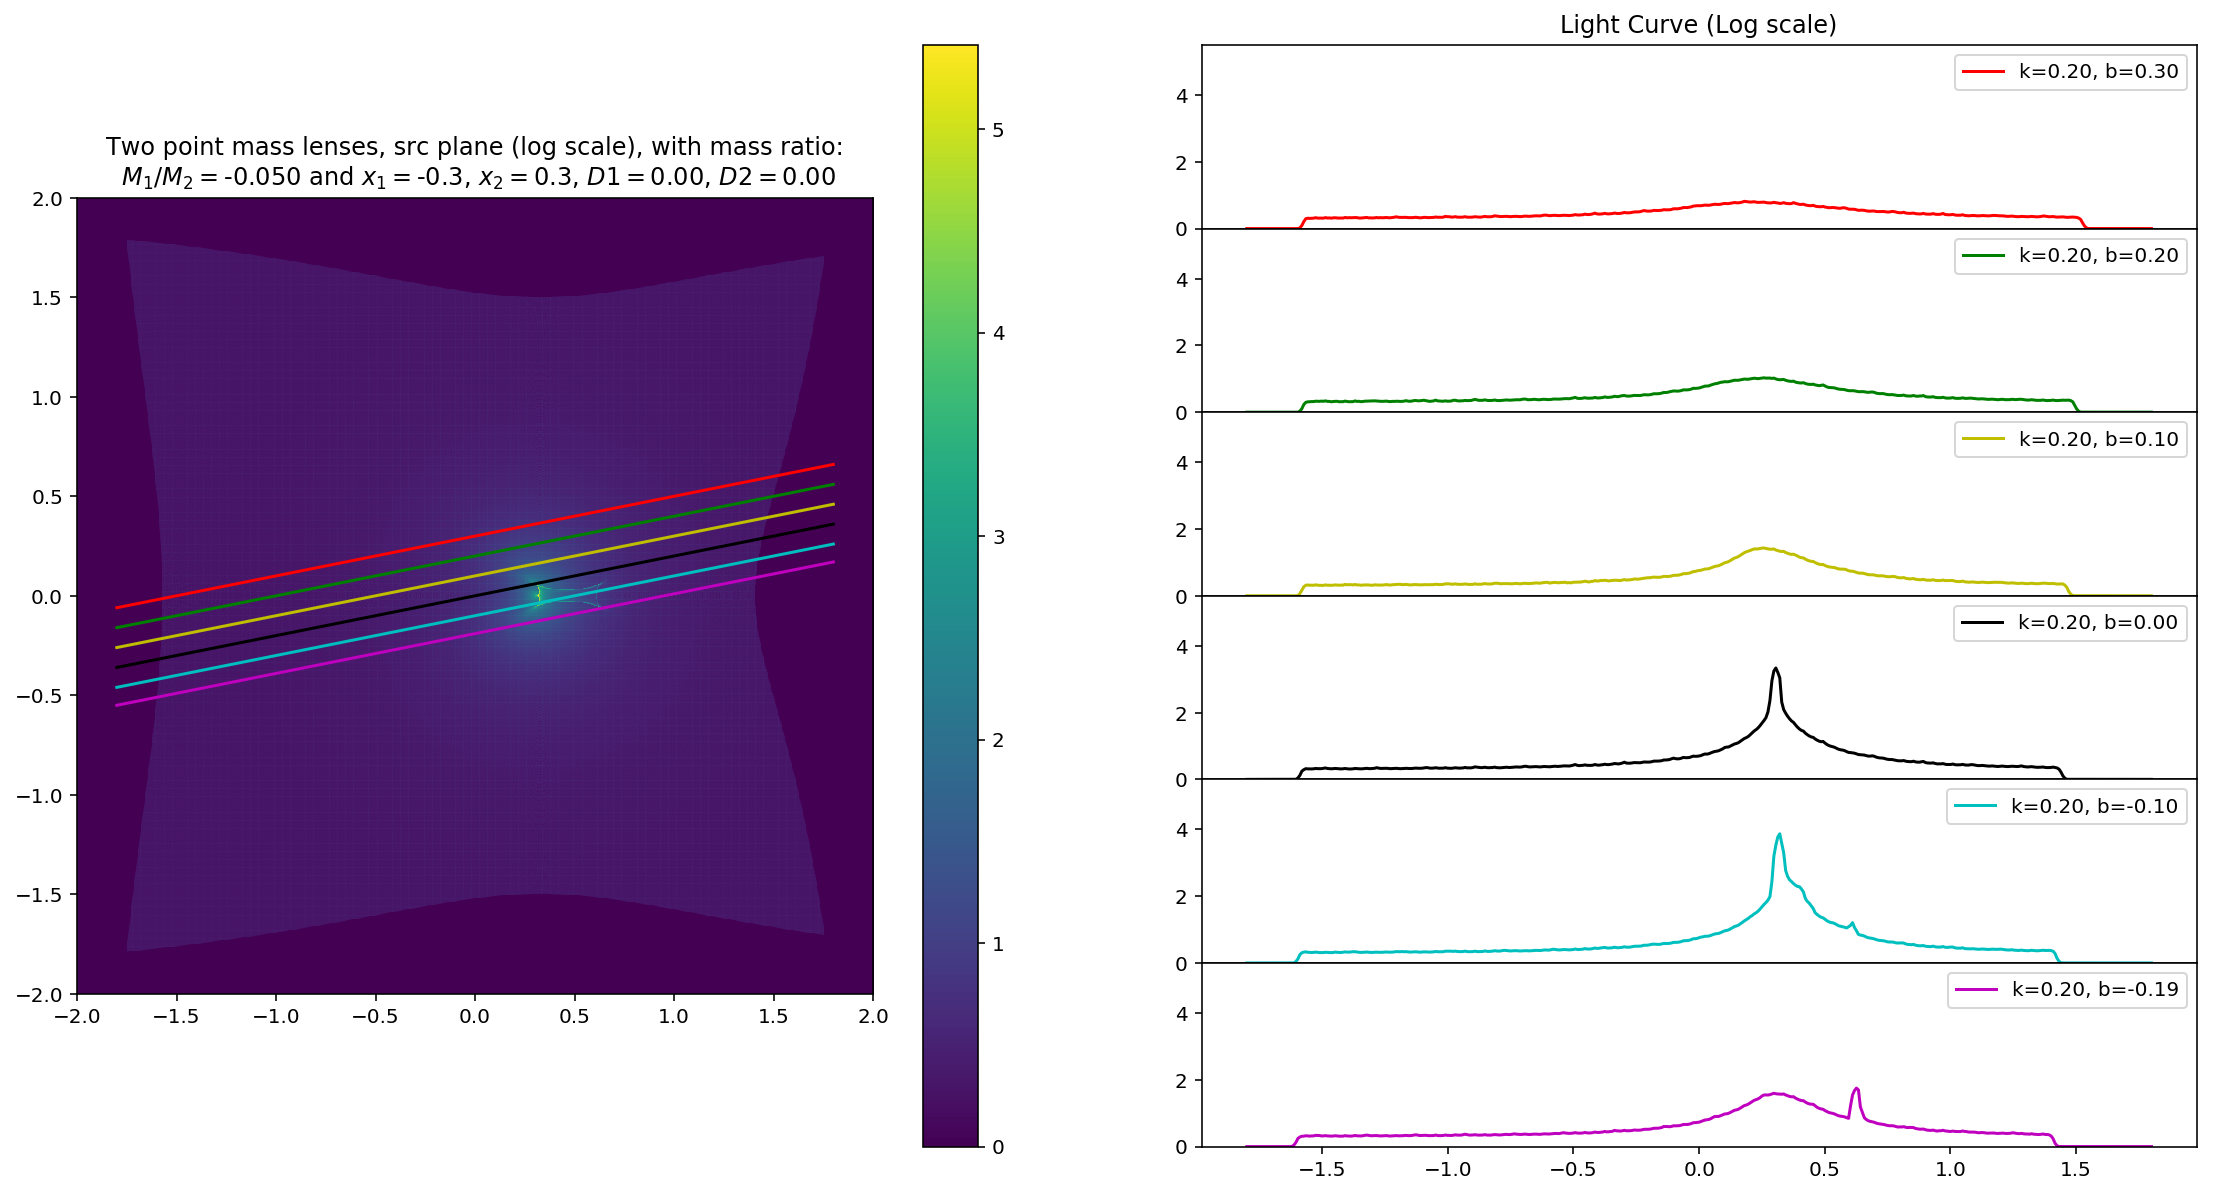

In [61]:
fig = plt.figure()
fig.set_size_inches(16,9)
plt.subplots_adjust(left=0.04, top = 0.9, bottom = 0.05, right=0.96, hspace = 0.13, wspace = 0.13)
plt.margins(0,0)

plt.subplot(121)

# plt.title("Source Place")
cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
plt.imshow(np.log10(srcplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
title = "Two point mass lenses, src plane (log scale), with mass ratio:\n"+r" $M_1/M_2=${:.3f} and $x_1=${:.1f}, $x_2 =${:.1f}, $D1={:.2f}$, $D2={:.2f}$".format(massratio, lens1.pos[0], lens2.pos[0], d1d2[0], d1d2[1])
plt.title(title)
plt.colorbar()
# plt.hold(True)
cnt = 0
for kb in KB:
    plt.plot(x,Y[kb],color=COLLOR[cnt])
    cnt += 1


axes = [1 for i in range(len(KB))]
cnt = 0
for kb in KB:
    axes[cnt] = plt.subplot(len(KB), 2, cnt*2+2) #int("42"+str(cnt*2+2))
    label = "k={:.2f}, b={:.2f}".format(kb[0],kb[1])
    axes[cnt].plot(x,np.log10(LC[kb]),color=COLLOR[cnt],label=label)
    axes[cnt].set_ylim([0,5.5])
    axes[cnt].legend()
    if cnt == 0:
        plt.title("Light Curve (Log scale)")
    cnt += 1
# axes[0].get_shared_x_axes().join(axes[0], axes[1], axes[2],axes[3])
# axes[0].set_xticklabels([])
plt.subplots_adjust(hspace=.0)